# Clustering K-Means


### Importacion de librerias 

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

#### Importacion del archivo

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Mapeo de la poblacion de estudio 

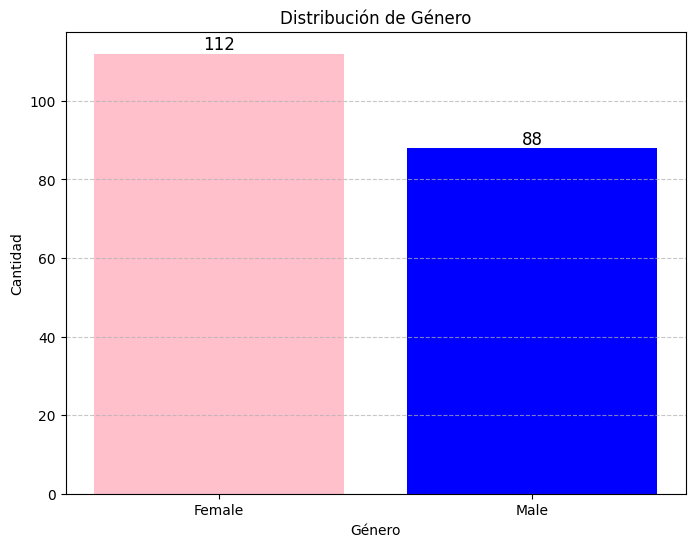

In [5]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom', fontsize=12)
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Exploracion de Datos Atipicos 

In [6]:
print("Cantidad de Registros con cero en Edad: ",df['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Salario: ",df['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Credito: ",df['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario:  0
Cantidad de Registros con cero en Data Credito:  0


Text(0.5, 1.0, 'Ingresos Atipicos')

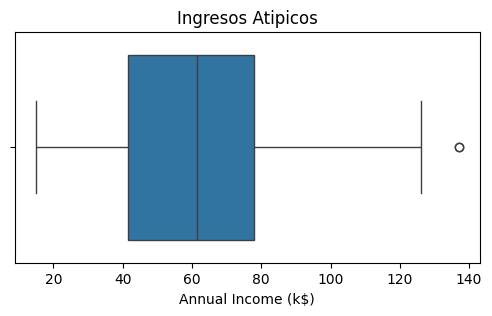

In [7]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Ingresos Atipicos')

#### Eliminacion de Datos Atipicos 

In [8]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((df['Annual Income (k$)']<nivel_minimo)|(df['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos por ingreso atípicos es {}".format(Total_Atipicos))

El total de datos por ingreso atípicos es 14


In [9]:
df=df[(df['Annual Income (k$)']<nivel_maximo)&(df['Annual Income (k$)']>nivel_minimo)]

In [10]:

Total_Atipicos=((df['Annual Income (k$)']<nivel_minimo)|(df['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos por ingreso atípicos es {}".format(Total_Atipicos))

El total de datos por ingreso atípicos es 0


### Data Limpia

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


### Modificacion de Datos

In [12]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 


df = df[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]


In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Exploracion de Correlacion de Datos
### Graficas de correracion de datos 

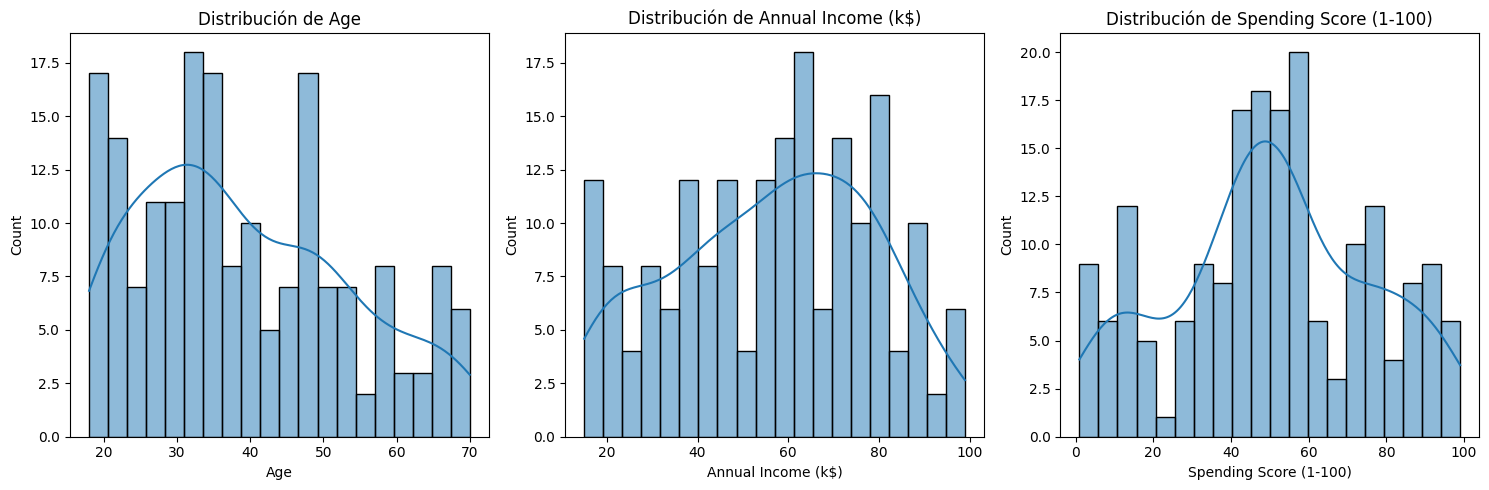

In [14]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

In [15]:
df1 = ["Age","Annual Income (k$)","Spending Score (1-100)"]


### Mapa de Calor -Correlacion de Datos

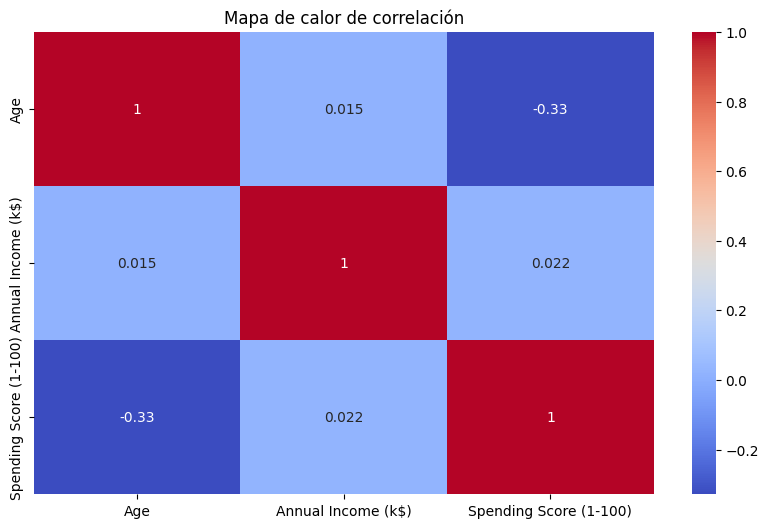

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df1].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

Distribucion de los Datos

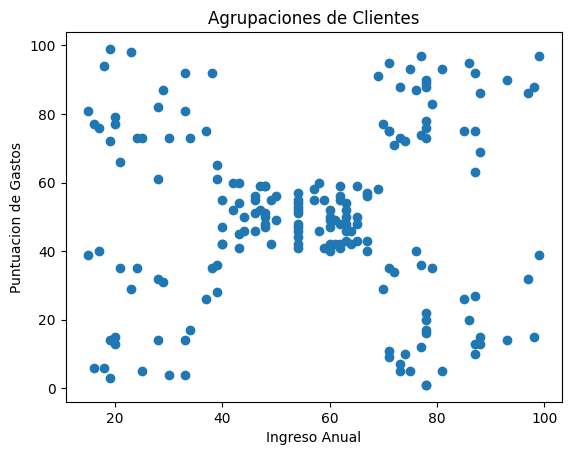

In [17]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuacion de Gastos')
plt.title('Agrupaciones de Clientes')
plt.show()

## Numeros de Clusters

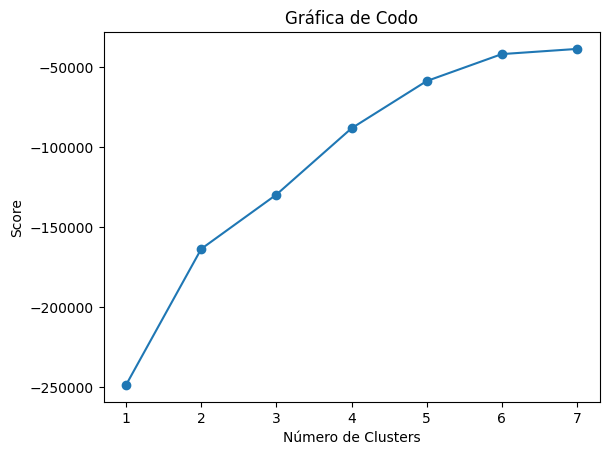

In [18]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

Numero Optimo de Clusters

In [19]:
Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(df)

KMeans(n_clusters=6, random_state=0)

Segmentacion por Grupos  

In [20]:
Modelo.labels_
df["Grupo"] = Modelo.labels_ 
print (df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0         0   19                  15                      39      5
1         0   21                  15                      81      2
2         1   20                  16                       6      5
3         1   23                  16                      77      2
4         1   31                  17                      40      5
..      ...  ...                 ...                     ...    ...
181       1   32                  97                      86      3
182       0   46                  98                      15      4
183       1   29                  98                      88      3
184       1   41                  99                      39      4
185       0   30                  99                      97      3

[186 rows x 5 columns]


Coeficientes de variacion

In [21]:
Observaciones = len(df)
X = df.drop('Grupo', axis=1)
clusters = df['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        186         |
|  Coeficiente Silhouette  | 0.4731067473440869 |
| Indice Calinski Harabasz | 177.84956505771365 |
|  Indice Davies Bouldin   | 0.7300121552505602 |
+--------------------------+--------------------+


Data Agrupada k_means

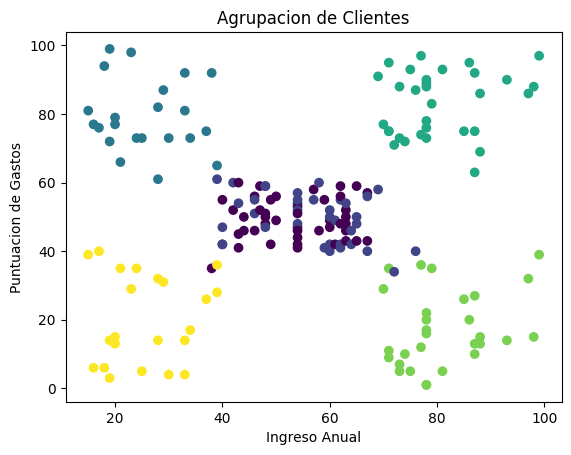

In [22]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuacion de Gastos')
plt.title('Agrupacion de Clientes')
plt.show()

Grafico 3d de la Data - Cubo OLAP

In [23]:
Grafica_3D = px.scatter_3d(df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('Grupo=%{marker.color}<br>Annua' ... '{y}<br>Age=%{z}<extra></extra>'),
              'legendgroup': '5',
              'marker': {'color': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
                                        dtype=int32),
                         'coloraxis': 'coloraxis',
                         'opacity': 0.7,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '5',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33, 33,
                          34, 37, 39, 39]),
              'y': array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4, 14,
                          17, 26, 36, 28]),
              'z': array([19, 20, 31, 35, 64, 67, 58, 37, 35, 52, 35, 46, 54, 45, 40, 60, 53, 49,
                          42, 36, 48, 49])},
             {'hovertemplate': ('Grupo=%{marker.color}<br>Annua' ... '{y}<br>Age=%{z}<extra></extra>'),
              'legendgroup': '2',
              'marker': {'color': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
                                        dtype=int32),
                         'coloraxis': 'coloraxis',
                         'opacity': 0.7,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '2',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33, 33,
                          34, 37, 38, 39]),
              'y': array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92, 81,
                          73, 75, 92, 65]),
              'z': array([21, 23, 22, 23, 30, 35, 24, 22, 20, 35, 25, 31, 29, 35, 23, 21, 18, 21,
                          30, 20, 24, 24])},
             {'hovertemplate': ('Grupo=%{marker.color}<br>Annua' ... '{y}<br>Age=%{z}<extra></extra>'),
              'legendgroup': '0',
              'marker': {'color': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
                         'coloraxis': 'coloraxis',
                         'opacity': 0.7,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '0',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([38, 40, 42, 43, 43, 43, 44, 44, 46, 46, 47, 47, 48, 48, 48, 49, 49, 50,
                          50, 54, 54, 54, 54, 54, 54, 54, 57, 58, 59, 60, 60, 61, 62, 62, 62, 63,
                          63, 63, 63, 63, 65, 65, 67, 67]),
              'y': array([35, 55, 52, 60, 45, 41, 50, 46, 46, 56, 52, 59, 51, 50, 48, 55, 42, 49,
                          56, 47, 53, 42, 51, 41, 44, 46, 58, 46, 55, 49, 47, 42, 48, 59, 56, 50,
                          46, 43, 48, 52, 43, 59, 43, 57]),
              'z': array([65, 50, 49, 59, 50, 47, 51, 69, 53, 70, 67, 54, 63, 43, 68, 70, 47, 60,
                          60, 59, 45, 49, 57, 67, 46, 48, 55, 50, 68, 48, 47, 48, 49, 67, 49, 66,
                          54, 68, 66, 65, 63, 49, 51, 50])},
             {'hovertemplate': ('Grupo=%{marker.color}<br>Annua' ... '{y}<br>Age=%{z}<extra></extra>'),
              'legendgroup': '1',
              'marker': {'color': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
                         'coloraxis': 'coloraxis',
                         'opacity': 0.7,
                         'symbol': 'circle'},
              'mode'

#Conclusiones 

Puntuacion de Gastos: los datos reflejan patrones claros en función de la edad, posiblemente relacionados con etapas de vida y hábitos que hacen variables los estilos de vida de los individuos de estudio.
Ingreso Anual: Define clusters asociados a niveles socioeconómicos de los sujetos de prueba.


Coeficiente de Silhouette: Los Valores  entre clusters dando como resultados :
Coeficiente Silhouette - 0.4108822268631121 , Indice Calinski Harabasz-118.59915954685793 y por ultimo el  Indice Davies Bouldin-1.0608372034019502 

El modelo se ajustar el número de clusters podría incrementar su precisión y aplicabilidad.



